In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PaddleOCR.paddleocr import PaddleOCR
from recognition import NumberPlateRecogniser

In [2]:
ocr = PaddleOCR(use_angle_cls=True, lang='en', detect=True, rec=True, rec_model_dir='./PaddleOCR/inference/en_PP-OCRv3_rec')

[2023/11/19 02:40:36] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=True, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/home/travisdavies/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='./PaddleOCR/inference/en_PP-OCRv3_rec', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_dict_path='

In [3]:
num_plate = cv2.imread("../datasets/cropped_vic_plates/21.jpg")

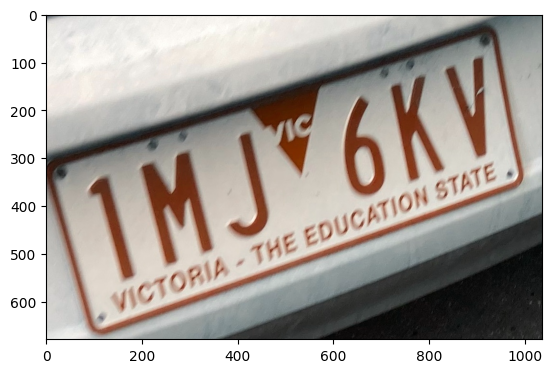

In [4]:
plt.imshow(num_plate)

In [5]:
result = ocr.ocr(num_plate)
print(len(result))
good_results = []
for idx in range(len(result)):
    res = result[idx]
    for line in res:
        y1 = line[0][0][1]
        y2 = line[0][1][1]
        y3 = line[0][2][1]
        y4 = line[0][3][1]
        y_coords = [y1, y2, y3, y4]
        y_min = min(y_coords)
        y_max = max(y_coords)


        h = y_max - y_min
        print(line)
        print(y_min, y_max, num_plate.shape[0] / 2)
        if y_min < num_plate.shape[0] / 2 and y_max > num_plate.shape[0] / 2 and h > 0.5 * num_plate.shape[0]:
            good_results.append(line)
        
good_results

[2023/11/19 02:40:39] ppocr DEBUG: dt_boxes num : 4, elapsed : 0.32267045974731445
[2023/11/19 02:40:39] ppocr DEBUG: cls num  : 4, elapsed : 0.024023771286010742
[2023/11/19 02:40:39] ppocr DEBUG: rec_res num  : 4, elapsed : 0.03216361999511719
1
[[[552.0, 185.0], [908.0, 69.0], [984.0, 293.0], [628.0, 409.0]], ('6KV', 0.9860427975654602)]
69.0 409.0 339.5
[[[46.0, 329.0], [472.0, 199.0], [554.0, 457.0], [128.0, 587.0]], ('1MJ', 0.9864105582237244)]
199.0 587.0 339.5
[[[129.0, 580.0], [939.0, 300.0], [957.0, 350.0], [147.0, 630.0]], ('VICTORIA-THEEDUCATIONSTATE', 0.9725490212440491)]
300.0 630.0 339.5


[[[[552.0, 185.0], [908.0, 69.0], [984.0, 293.0], [628.0, 409.0]],
  ('6KV', 0.9860427975654602)],
 [[[46.0, 329.0], [472.0, 199.0], [554.0, 457.0], [128.0, 587.0]],
  ('1MJ', 0.9864105582237244)]]

In [6]:
label = ''
labels = []
ordered_results = sorted(good_results, key=lambda x: x[0][0])
for label_subtext in ordered_results:
    label += label_subtext[1][0]
labels.append(label)

labels



['1MJ6KV']

In [7]:
ocr.ocr(num_plate)[0]

[2023/11/19 02:40:39] ppocr DEBUG: dt_boxes num : 4, elapsed : 0.04051637649536133
[2023/11/19 02:40:39] ppocr DEBUG: cls num  : 4, elapsed : 0.00585484504699707
[2023/11/19 02:40:39] ppocr DEBUG: rec_res num  : 4, elapsed : 0.024606943130493164


[[[[552.0, 185.0], [908.0, 69.0], [984.0, 293.0], [628.0, 409.0]],
  ('6KV', 0.9860427975654602)],
 [[[46.0, 329.0], [472.0, 199.0], [554.0, 457.0], [128.0, 587.0]],
  ('1MJ', 0.9864105582237244)],
 [[[129.0, 580.0], [939.0, 300.0], [957.0, 350.0], [147.0, 630.0]],
  ('VICTORIA-THEEDUCATIONSTATE', 0.9725490212440491)]]

In [8]:
model = NumberPlateRecogniser(size='n')

[2023/11/19 02:40:39] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=True, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/home/travisdavies/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='./best_weights/paddlepaddle', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_dict_path='/home/trav

In [219]:
num_plate2 = cv2.imread("../datasets/aus_number_plates/74.jpg")

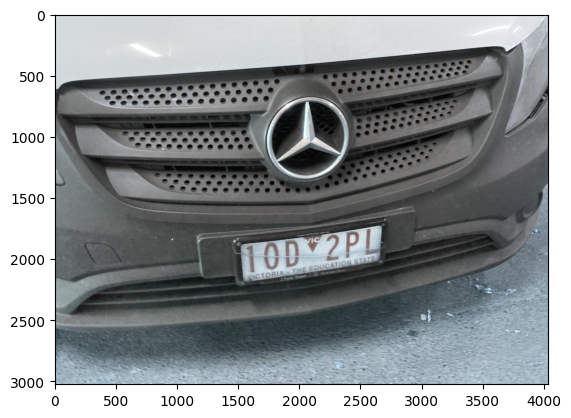

In [220]:
plt.imshow(num_plate2)

In [221]:
bboxes = model.extract_bboxes(num_plate2)


0: 576x768 1 number_plate, 10.3ms
Speed: 19.1ms preprocess, 10.3ms inference, 2.2ms postprocess per image at shape (1, 3, 576, 768)


In [222]:
bboxes

[(1459, 1727, 2710, 2209)]

In [223]:
labels = model.extract_text(num_plate2, bboxes)

[2023/11/19 02:52:52] ppocr DEBUG: dt_boxes num : 3, elapsed : 0.025788545608520508
[2023/11/19 02:52:52] ppocr DEBUG: cls num  : 3, elapsed : 0.0058362483978271484
[2023/11/19 02:52:52] ppocr DEBUG: rec_res num  : 3, elapsed : 0.028102874755859375
[[[[[506.0, 104.0], [1135.0, 18.0], [1168.0, 239.0], [538.0, 325.0]], ('2P1', 0.8481019139289856)], [[[80.0, 163.0], [544.0, 104.0], [575.0, 336.0], [112.0, 395.0]], ('10D', 0.922585666179657)], [[[107.0, 405.0], [1157.0, 248.0], [1165.0, 294.0], [114.0, 452.0]], ('WICTORIA-TNEEDUCATIONSTATE', 0.8505303263664246)]]]


In [224]:
labels

['10D2P1']

In [225]:
annotated_img = model.annotate(num_plate2, bboxes, labels)

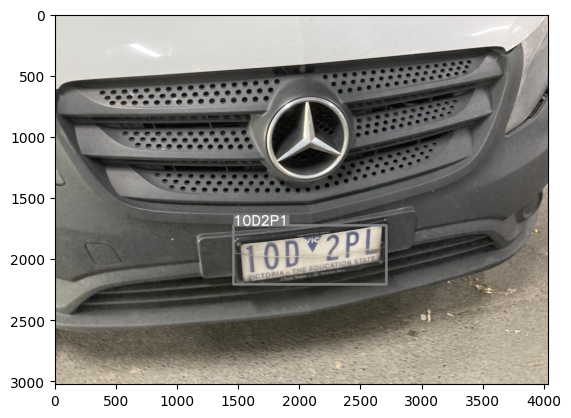

In [226]:
plt.imshow(annotated_img[0])